<a href="https://colab.research.google.com/github/s22a0064-AinMaisarah/EC2024/blob/main/StudentSurvey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame with a different encoding
try:
    df = pd.read_csv('/content/STUDENT-SURVEY.csv', encoding='cp1252')
    # Display the DataFrame
    display(df)
except UnicodeDecodeError:
    print("Could not decode the file with cp1252 encoding. Please check the file encoding.")

Timestamp  Gender   Faculty  Engineering Program Law Program  \
0    1/25/2016 14:37    Male      Arts                  NaN         NaN   
1    1/25/2016 14:38  Female      Arts                  NaN         NaN   
2    1/25/2016 14:40    Male      Arts                  NaN         NaN   
3    1/25/2016 14:43    Male      Arts                  NaN         NaN   
4    1/25/2016 14:45  Female      Arts                  NaN         NaN   
..               ...     ...       ...                  ...         ...   
495   4/2/2016 10:49    Male  Business                  NaN         NaN   
496   4/2/2016 11:02    Male  Business                  NaN         NaN   
497   4/2/2016 11:03    Male  Business                  NaN         NaN   
498   4/2/2016 11:03  Female  Business                  NaN         NaN   
499   4/2/2016 11:21    Male  Business                  NaN         NaN   

    Business Program     Arts Program  Other Program  \
0                NaN  B.A. in English            NaN   
1                NaN  B.A. in English            NaN   
2                NaN  B.A. in English            NaN   
3                NaN  B.A. in English            NaN   
4                NaN  B.A. in English            NaN   
..               ...              ...            ...   
495              BBA              NaN            NaN   
496              BBA              NaN            NaN   
497              BBA              NaN            NaN   
498              BBA              NaN            NaN   
499              BBA              NaN            NaN   

    Bachelor  Academic Year in EU Masters Academic Year in EU  ...  \
0                        3rd Year                         NaN  ...   
1                        4th Year                         NaN  ...   
2                        3rd Year                         NaN  ...   
3                        3rd Year                         NaN  ...   
4                        4th Year                         NaN  ...   
..                            ...                         ...  ...   
495                      2nd Year                         NaN  ...   
496                      1st Year                         NaN  ...   
497                      1st Year                         NaN  ...   
498                      1st Year                         NaN  ...   
499                      1st Year                         NaN  ...   

    Q3 [What was your expectation about the University as related to quality of resources?]  \
0                                                  4.0                                        
1                                                  4.0                                        
2                                                  4.0                                        
3                                                  4.0                                        
4                                                  4.0                                        
..                                                 ...                                        
495                                                2.0                                        
496                                                2.0                                        
497                                                2.0                                        
498                                                4.0                                        
499                                                2.0                                        

     Q4 [What was your expectation about the University as related to quality of learning environment?]  \
0                                                  4.0                                                    
1                                                  4.0                                                    
2                                                  4.0                                                    
3                          

# Task
Clean the dataset loaded from "/content/STUDENT-SURVEY.csv" by identifying and handling missing values and duplicates, and resolving other potential data issues to obtain a clean dataset.

## Identify missing values

### Subtask:
Calculate and display the number of missing values per column.


**Reasoning**:
Calculate and display the number of missing values per column as instructed.



In [3]:
missing_values = df.isnull().sum()
display(missing_values)

Timestamp                                                                         0
Gender                                                                            1
Faculty                                                                           0
Engineering Program                                                             500
Law Program                                                                     434
                                                                               ... 
Q8. In your opinion,the next best aspect of the program is                       24
What aspects of the program could be improved?                                   10
Do you feel that the quality of education improved at EU over the last year?     78
Do you feel that the image of the University improved over the last year?        76
Username                                                                        500
Length: 87, dtype: int64

## Identify duplicates

### Subtask:
Check for and display duplicate rows.


**Reasoning**:
Check for and display the number of duplicate rows in the DataFrame.



In [4]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## Handle missing values

### Subtask:
Address missing values using appropriate methods (e.g., imputation, removal).


**Reasoning**:
Identify and drop columns with more than 50% missing values, then impute missing values for other columns with the mode since many columns are categorical or have a limited number of unique values. Finally, verify that missing values have been handled.



In [5]:
# Calculate the percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100

# Identify columns to drop (more than 50% missing)
cols_to_drop = missing_percentage[missing_percentage > 50].index

# Drop the identified columns
df_cleaned = df.drop(columns=cols_to_drop)

# Impute missing values in remaining columns with the mode
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)

# Verify that missing values have been handled
missing_values_cleaned = df_cleaned.isnull().sum()
display(missing_values_cleaned)

/tmp/ipython-input-3941971610.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)


Timestamp                                                                       0
Gender                                                                          0
Faculty                                                                         0
Business Program                                                                0
Bachelor  Academic Year in EU                                                   0
                                                                               ..
Q7. In your opinion,the best aspect of the program is                           0
Q8. In your opinion,the next best aspect of the program is                      0
What aspects of the program could be improved?                                  0
Do you feel that the quality of education improved at EU over the last year?    0
Do you feel that the image of the University improved over the last year?       0
Length: 73, dtype: int64

## Identify and resolve other issues

### Subtask:
Explore the dataset for other potential issues like inconsistent data types or outliers and address them.


**Reasoning**:
Display the data types of each column in the cleaned DataFrame `df_cleaned` using the `.info()` method to identify any inconsistent or inappropriate data types, and then examine the unique values of categorical columns to check for inconsistencies.



In [6]:
df_cleaned.info()

# Examine unique values for object type columns
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"\nUnique values for column: {col}")
    print(df_cleaned[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   Timestamp                                                                                                                                                                          500 non-null    object 
 1   Gender                                                                                                                                                                             500 non-null    object 
 2   Faculty                                                   

**Reasoning**:
Based on the `df_cleaned.info()` output, the 'Timestamp' column is of object type and should be converted to datetime. Also, the unique values printed for object columns reveal some inconsistencies that need to be standardized. I will convert the 'Timestamp' column and standardize the entries in categorical columns.



In [7]:
# Convert 'Timestamp' to datetime
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Standardize 'Gender' column
df_cleaned['Gender'] = df_cleaned['Gender'].replace({'M': 'Male', 'f': 'Female'})

# Standardize 'Did you ever attend a Coaching center?' column
df_cleaned['Did you ever attend a Coaching center?'] = df_cleaned['Did you ever attend a Coaching center?'].replace({'no': 'No', 'yes': 'Yes'})

# Standardize 'H.S.C or Equivalent study medium' column
df_cleaned['H.S.C or Equivalent study medium'] = df_cleaned['H.S.C or Equivalent study medium'].replace({'english': 'English'})

# Standardize 'Benifits you received from the coaching center' column
df_cleaned['Benifits you received from the coaching center'] = df_cleaned['Benifits you received from the coaching center'].replace({'yes': 'Yes', 'no': 'No'})

# Check unique values after standardization
for col in ['Gender', 'Did you ever attend a Coaching center?', 'H.S.C or Equivalent study medium', 'Benifits you received from the coaching center']:
    print(f"\nUnique values for column: {col} after standardization")
    print(df_cleaned[col].unique())


Unique values for column: Gender after standardization
['Male' 'Female']

Unique values for column: Did you ever attend a Coaching center? after standardization
['No' 'Yes']

Unique values for column: H.S.C or Equivalent study medium after standardization
['Bangla Medium' 'English Medium' 'Madrasa' 'Others' 'Diploma']

Unique values for column: Benifits you received from the coaching center after standardization
['It prepared me better for the exam' 'It increased my desire to learn'
 'It improved my understanding of subject matter'
 'It prepared me better for the exam, It improved my understanding of subject matter, It increased my desire to learn'
 'It prepared me better for the exam, It improved my GPA Score, It improved my understanding of subject matter'
 'It prepared me better for the exam, It improved my understanding of subject matter, It increased my desire to learn, It allow me to make good friends'
 'It prepared me better for the exam, It improved my understanding of subject

**Reasoning**:
The categorical columns have been standardized and the timestamp column converted. Now, I need to examine the numerical columns for outliers. I will identify the numerical columns and then visualize them using box plots to check for outliers.



ValueError: num must be an integer with 1 <= num <= 20, not 21

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


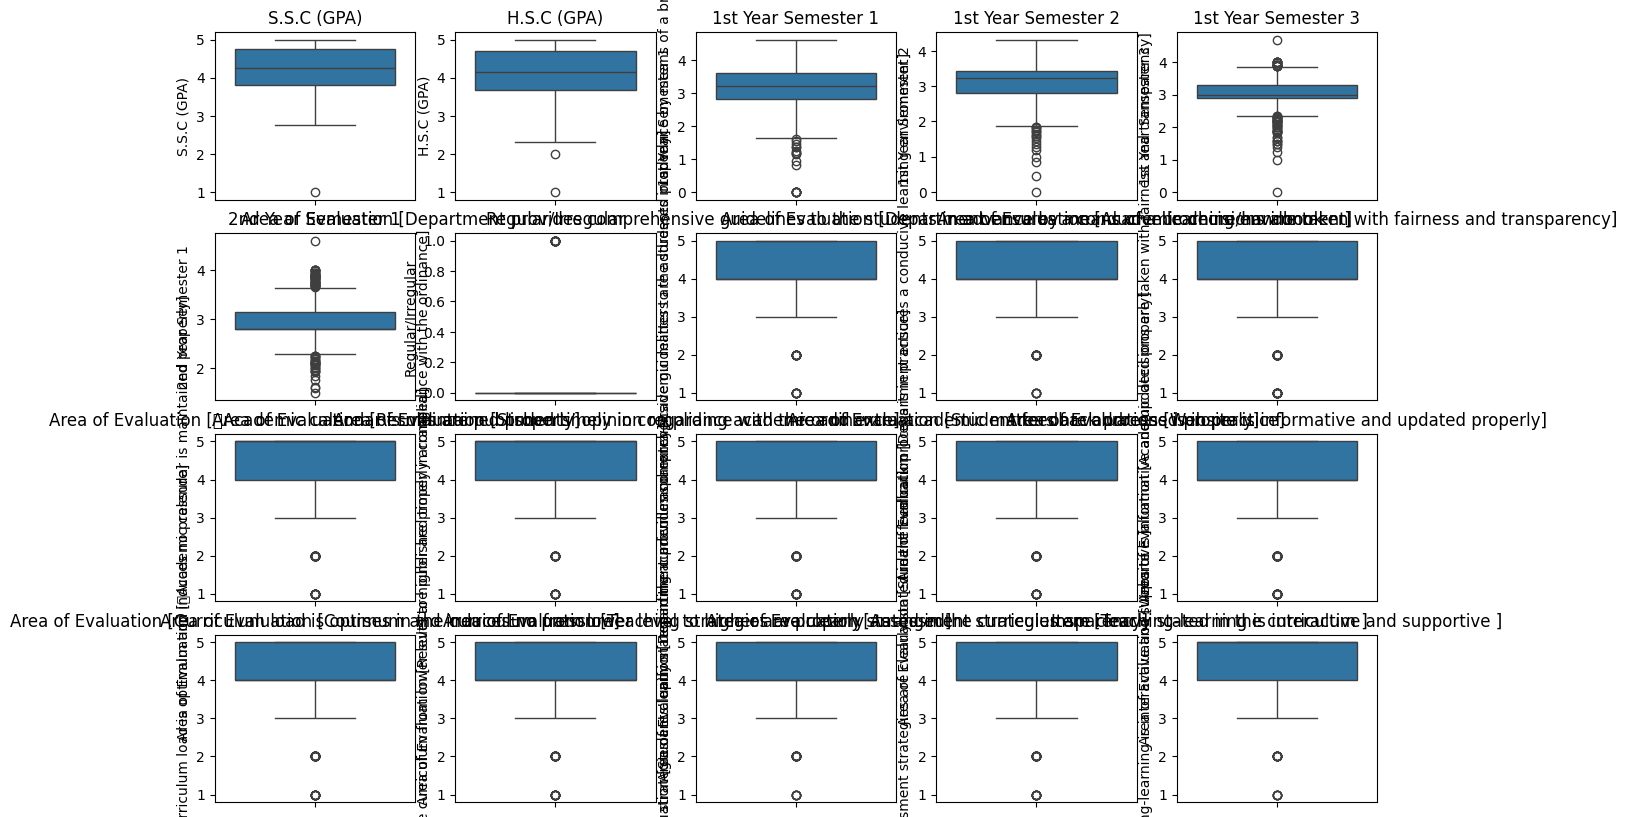

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous attempt to plot box plots failed because the number of subplots exceeded the specified grid size (4x5=20). I need to adjust the figure size and the layout of the subplots to accommodate all numerical columns. I will increase the number of rows in the subplot grid.



/tmp/ipython-input-2618315617.py:17: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


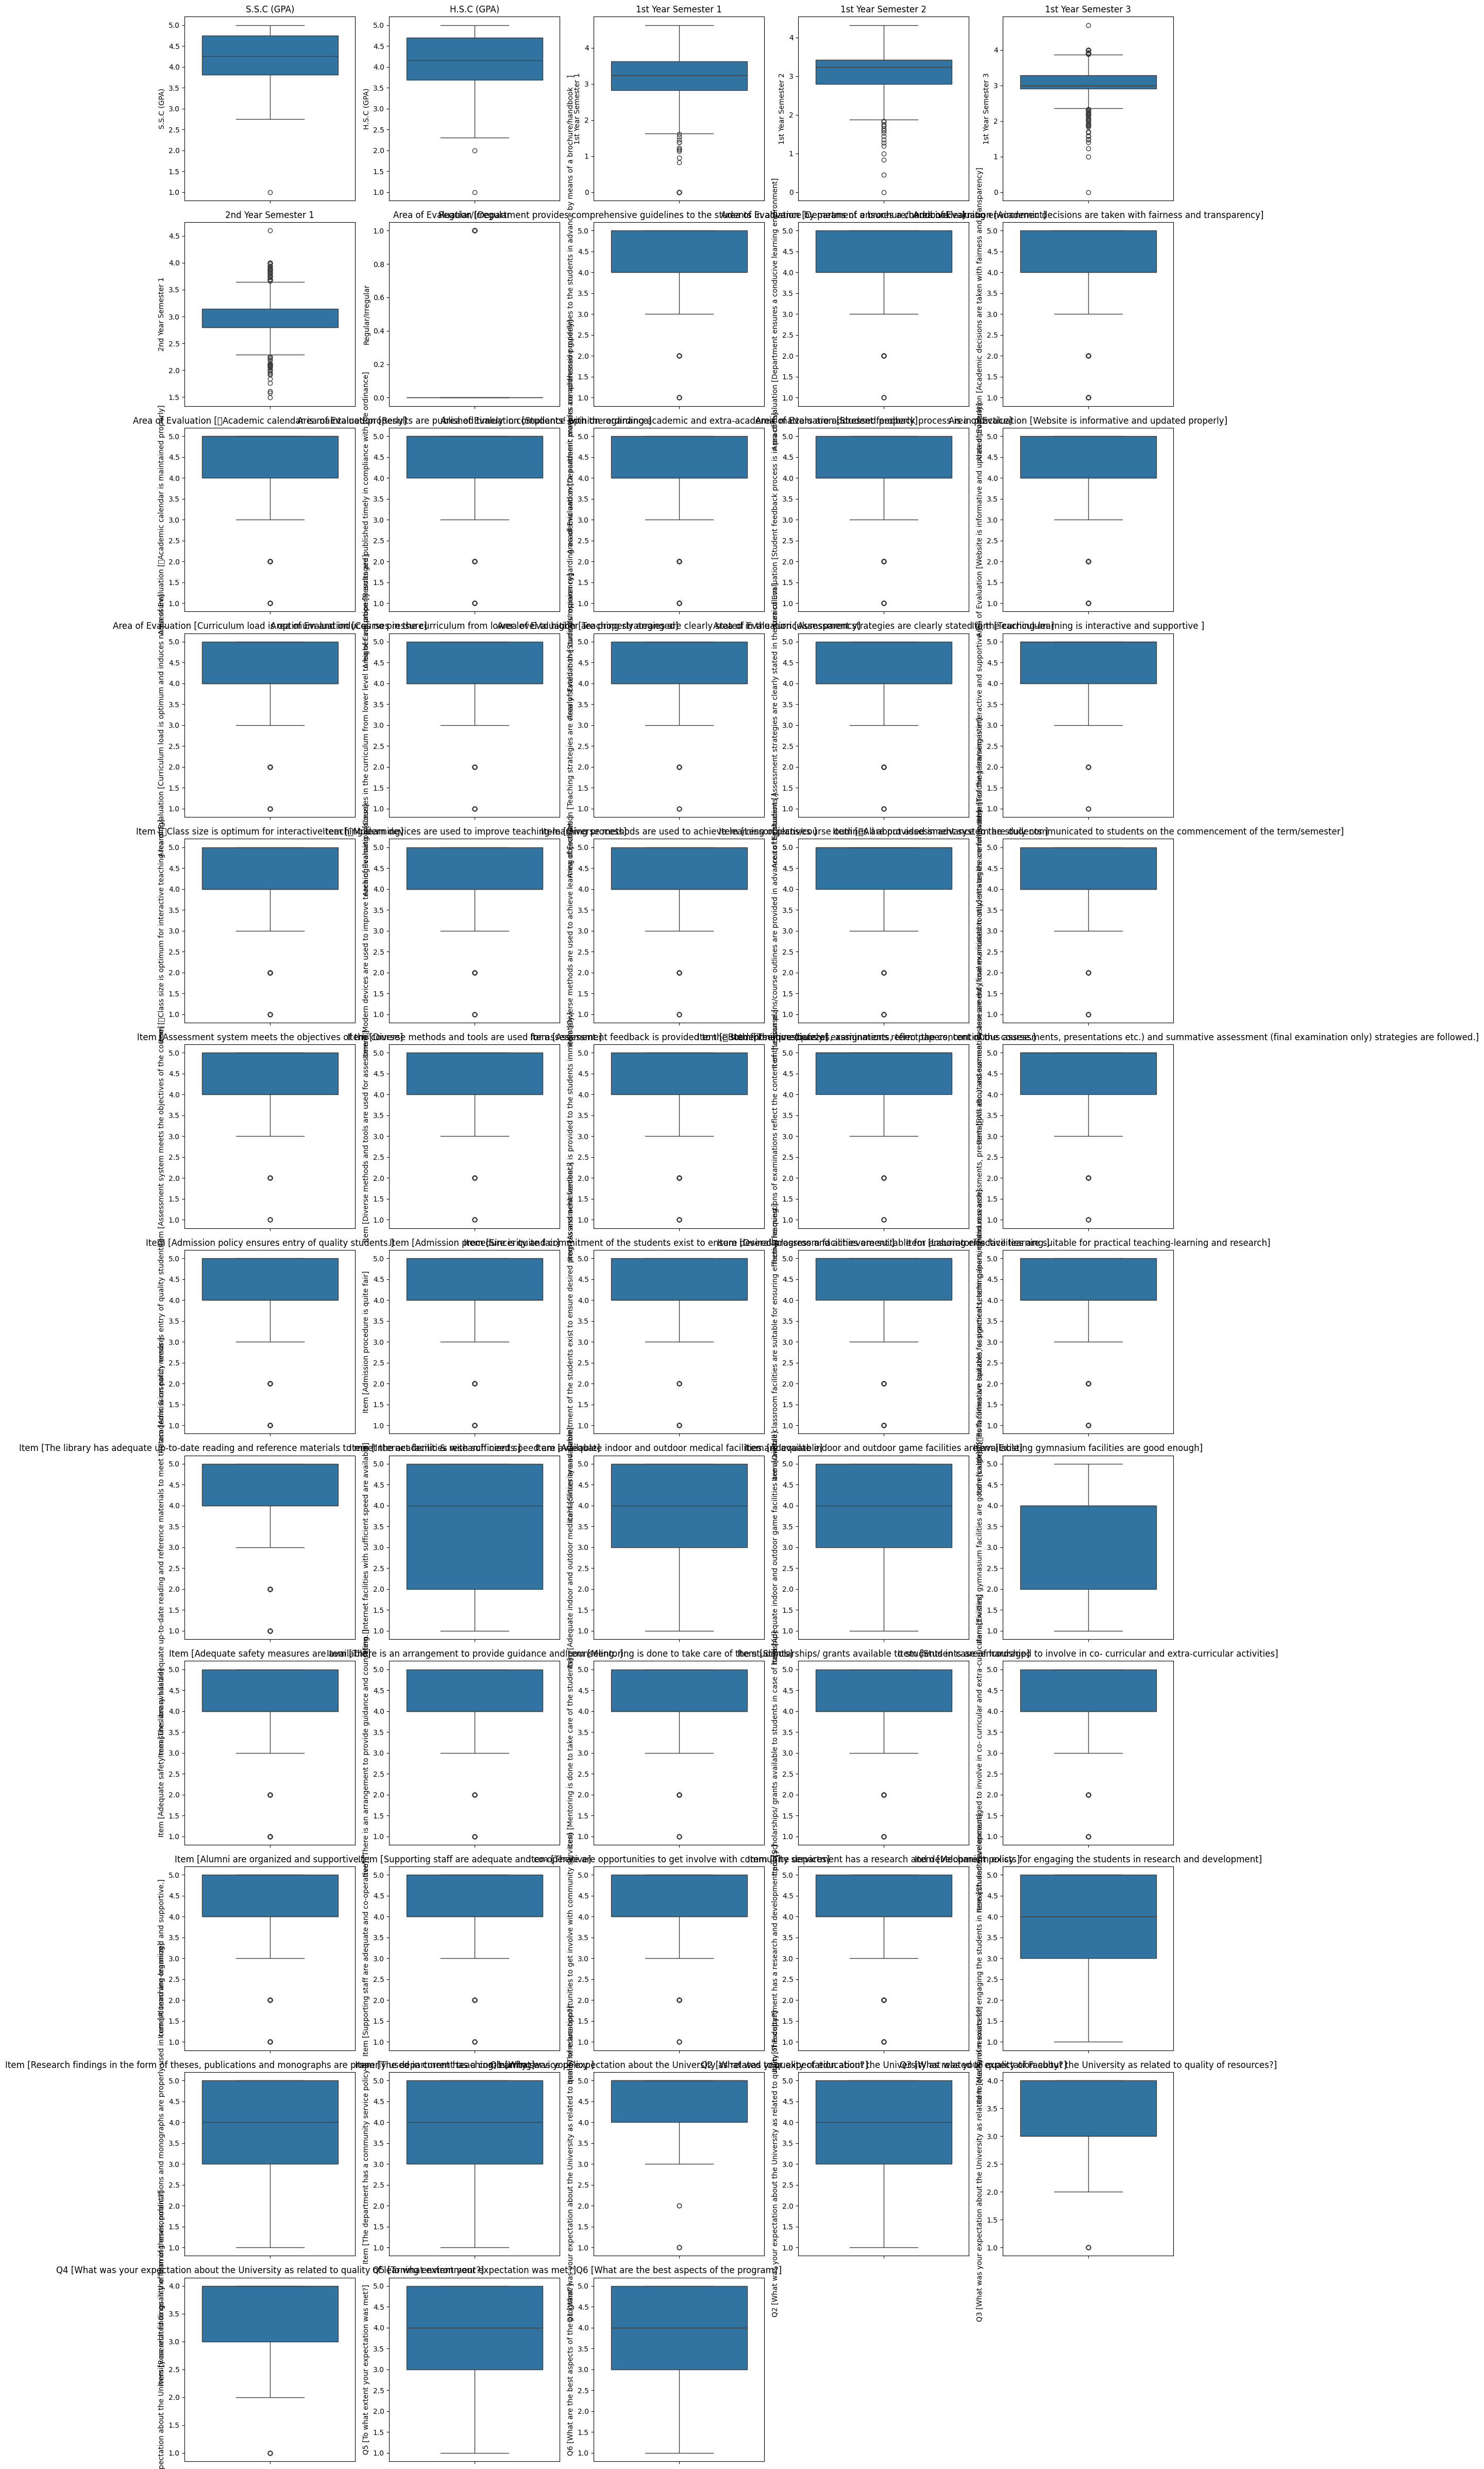

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed for subplots
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Plot box plots for numerical columns to visualize outliers
plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Reasoning**:
The box plots have been generated and displayed. I can observe potential outliers in several numerical columns. The next step is to decide on a strategy to handle these outliers and implement it. Based on the plots, Winsorizing might be a suitable approach to limit the effect of extreme values without removing them entirely. I will apply Winsorizing to the numerical columns that show outliers in the box plots.



In [10]:
from scipy.stats.mstats import winsorize

# Identify numerical columns to winsorize based on the box plots
cols_to_winsorize = [
    'S.S.C (GPA)',
    'H.S.C (GPA)',
    '1st Year Semester 1',
    '1st Year Semester 2',
    '1st Year Semester 3',
    '2nd Year Semester 1',
    'Regular/Irregular',
    'Q3 [What was your expectation about the University as related to quality of resources?]',
    'Q4 [What was your expectation about the University as related to quality of learning environment?]',
    'Q5 [To what extent your expectation was met?]',
    'Q6 [What are the best aspects of the program?]'
]

# Apply winsorization to the identified numerical columns
for col in cols_to_winsorize:
    df_cleaned[col] = winsorize(df_cleaned[col], limits=[0.05, 0.05])

# Display the descriptive statistics of the winsorized columns to see the effect
display(df_cleaned[cols_to_winsorize].describe())

S.S.C (GPA)  H.S.C (GPA)  1st Year Semester 1  1st Year Semester 2  \
count   500.000000   500.000000            500.00000           500.000000   
mean      4.236820     4.119700              3.15916             3.091000   
std       0.579262     0.626721              0.59192             0.516961   
min       3.130000     3.000000              1.75000             1.940000   
25%       3.810000     3.685000              2.82500             2.797500   
50%       4.250000     4.150000              3.23500             3.240000   
75%       4.750000     4.700000              3.63000             3.420000   
max       5.000000     5.000000              4.00000             3.880000   

       1st Year Semester 3  2nd Year Semester 1  Regular/Irregular  \
count           500.000000            500.00000              500.0   
mean              3.035780              2.94180                0.0   
std               0.428834              0.39536                0.0   
min               2.090000              2.22000                0.0   
25%               2.910000              2.80000                0.0   
50%               3.000000              2.80000                0.0   
75%               3.292500              3.14250                0.0   
max               3.800000              3.81000                0.0   

       Q3 [What was your expectation about the University as related to quality of resources?]  \
count                                         500.000000                                         
mean                                            3.324000                                         
std                                             0.726691                                         
min                                             2.000000                                         
25%                                             3.000000                                         
50%                                             3.000000                                         
75%                                             4.000000                                         
max                                             4.000000                                         

       Q4 [What was your expectation about the University as related to quality of learning environment?]  \
count                                         500.000000                                                    
mean                                            3.436000                                                    
std                                             0.665424                                                    
min                                             2.000000                                                    
25%                                             3.000000                                                    
50%                                             4.000000                                                    
75%                                             4.000000                                                    
max                                             4.000000                                                    

       Q5 [To what extent your expectation was met?]  \
count                                     500.000000   
mean                                        3.956000   
std                                         0.848235   
min                                         2.000000   
25%                                         3.000000   
50%                                         4.000000   
75%                                         5.000000   
max                                         5.000000   

       Q6 [What are the best aspects of the program?]  
count                                      500.000000  
mean                                         3.904000  
std                                          1.126642  
min                                          2.000000  
25%                             

## Display cleaned data

### Subtask:
Display the first few rows of the cleaned DataFrame and its information to confirm the changes.


**Reasoning**:
Display the first few rows and information of the cleaned DataFrame to verify the cleaning process.



In [11]:
display(df_cleaned.head())
df_cleaned.info()

Timestamp  Gender Faculty Business Program  \
0 2016-01-25 14:37:00    Male    Arts              BBA   
1 2016-01-25 14:38:00  Female    Arts              BBA   
2 2016-01-25 14:40:00    Male    Arts              BBA   
3 2016-01-25 14:43:00    Male    Arts              BBA   
4 2016-01-25 14:45:00  Female    Arts              BBA   

  Bachelor  Academic Year in EU H.S.C or Equivalent study medium  S.S.C (GPA)  \
0                      3rd Year                    Bangla Medium         4.88   
1                      4th Year                    Bangla Medium         4.56   
2                      3rd Year                    Bangla Medium         4.25   
3                      3rd Year                    Bangla Medium         3.38   
4                      4th Year                    Bangla Medium         5.00   

   H.S.C (GPA) Did you ever attend a Coaching center?  \
0          4.4                                     No   
1          4.5                                     No   
2          3.0                                     No   
3          3.6                                     No   
4          4.7                                    Yes   

             Coaching center name  ...  \
0                             ucc  ...   
1                             ucc  ...   
2                             ucc  ...   
3                             ucc  ...   
4  Ratina medical coaching center  ...   

  Q2 [What was your expectation about the University as related to quality of Faculty?]  \
0                                                5.0                                      
1                                                4.0                                      
2                                                5.0                                      
3                                                5.0                                      
4                                                5.0                                      

   Q3 [What was your expectation about the University as related to quality of resources?]  \
0                                                4.0                                         
1                                                4.0                                         
2                                                4.0                                         
3                                                4.0                                         
4                                                4.0                                         

   Q4 [What was your expectation about the University as related to quality of learning environment?]  \
0                                                4.0                                                    
1                                                4.0                                                    
2                                                4.0                                                    
3                                                3.0                                                    
4                                                4.0                                                    

   Q5 [To what extent your expectation was met?]  \
0                                            5.0   
1                                            5.0   
2                                            5.0   
3                                            4.0   
4                                            3.0   

   Q6 [What are the best aspects of the program?]  \
0                                             5.0   
1                                             5.0   
2                                             3.0   
3                                             5.0   
4                                             2.0   

   Q7. In your opinion,the best aspect of the program is  \
0                                  Teaching/Learning       
1                                            Faculty       
2                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype         
---  ------                                                                                                                                                                             --------------  -----         
 0   Timestamp                                                                                                                                                                          500 non-null    datetime64[ns]
 1   Gender                                                                                                                                                                             500 non-null    object        
 2   Faculty                       

**DATASET AFTER CLEANING**

In [13]:
import pandas as pd

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the cleaned DataFrame
display(df_cleaned)

# Reset pandas options to default (optional but good practice)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Timestamp  Gender   Faculty         Business Program  \
0   2016-01-25 14:37:00    Male      Arts                      BBA   
1   2016-01-25 14:38:00  Female      Arts                      BBA   
2   2016-01-25 14:40:00    Male      Arts                      BBA   
3   2016-01-25 14:43:00    Male      Arts                      BBA   
4   2016-01-25 14:45:00  Female      Arts                      BBA   
5   2016-01-25 14:47:00  Female      Arts                      BBA   
6   2016-01-25 14:47:00  Female      Arts                      BBA   
7   2016-01-25 14:51:00  Female      Arts                      BBA   
8   2016-01-25 14:53:00    Male      Arts                      BBA   
9   2016-01-25 14:59:00  Female      Arts                      BBA   
10  2016-01-25 15:06:00  Female      Arts                      BBA   
11  2016-01-25 15:07:00  Female      Arts                      BBA   
12  2016-01-25 15:08:00    Male      Arts                      BBA   
13  2016-01-25 15:11:00  Female      Arts                      BBA   
14  2016-01-25 15:13:00  Female      Arts                      BBA   
15  2016-01-25 15:13:00  Female      Arts                      BBA   
16  2016-01-25 15:30:00  Female      Arts                      BBA   
17  2016-01-25 15:30:00  Female      Arts                      BBA   
18  2016-01-25 16:03:00  Female      Arts                      BBA   
19  2016-01-26 13:52:00  Female      Arts                      BBA   
20  2016-01-26 14:07:00  Female      Arts                      BBA   
21  2016-01-26 14:13:00  Female      Arts                      BBA   
22  2016-01-26 14:16:00  Female      Arts                      BBA   
23  2016-01-26 14:16:00  Female      Arts                      BBA   
24  2016-01-26 14:16:00  Female      Arts                      BBA   
25  2016-01-26 14:16:00    Male  Business                      BBA   
26  2016-01-26 14:17:00  Female      Arts                      BBA   
27  2016-01-26 14:36:00  Female      Arts                      BBA   
28  2016-01-26 14:38:00    Male  Business                      BBA   
29  2016-01-26 14:38:00    Male      Arts                      BBA   
30  2016-01-26 14:40:00    Male      Arts                      BBA   
31  2016-01-26 14:40:00  Female      Arts                      BBA   
32  2016-01-26 14:41:00  Female      Arts                      BBA   
33  2016-01-26 14:42:00  Female      Arts                      BBA   
34  2016-01-26 14:43:00  Female      Arts                      BBA   
35  2016-01-26 16:22:00  Female      Arts                      BBA   
36  2016-01-26 16:22:00  Female      Arts                      BBA   
37  2016-01-26 16:32:00    Male      Arts                      BBA   
38  2016-01-26 17:02:00    Male      Arts                      BBA   
39  2016-01-26 17:10:00  Female      Arts                      BBA   
40  2016-01-26 17:10:00  Female      Arts                      BBA   
41  2016-01-26 17:12:00  Female      Arts                      BBA   
42  2016-01-26 17:12:00  Female      Arts                      BBA   
43  2016-01-26 17:13:00    Male      Arts                      BBA   
44  2016-01-26 17:13:00  Female      Arts                      BBA   
45  2016-01-26 17:13:00  Female      Arts                      BBA   
46  2016-01-26 17:14:00  Female      Arts                      BBA   
47  2016-01-27 11:50:00    Male  Business                      BBA   
48  2016-01-27 12:13:00  Female      Arts                      BBA   
49  2016-01-27 12:13:00    Male      Arts                      BBA   
50  2016-01-27 12:15:00    Male      Arts                      BBA   
51  2016-01-27 12:17:00    Male      Arts                      BBA   
52  2016-01-27 14:10:00  Female  Business                      BBA   
53  2016-01-27 14:12:00    Male  Business                      BBA   
54  2016-01-27 14:13:00    Male  Business                      BBA   
55  2016-01-27 14:13:00    Male  Business                      BBA   
56  2016-01-27 14:15:00 

In [14]:
# Filter the DataFrame to include only rows where 'Faculty' is 'Arts'
arts_faculty_df = df_cleaned[df_cleaned['Faculty'] == 'Arts']

# Display the first 5 rows of the new DataFrame
display(arts_faculty_df.head())

Timestamp  Gender Faculty Business Program  \
0 2016-01-25 14:37:00    Male    Arts              BBA   
1 2016-01-25 14:38:00  Female    Arts              BBA   
2 2016-01-25 14:40:00    Male    Arts              BBA   
3 2016-01-25 14:43:00    Male    Arts              BBA   
4 2016-01-25 14:45:00  Female    Arts              BBA   

  Bachelor  Academic Year in EU H.S.C or Equivalent study medium  S.S.C (GPA)  \
0                      3rd Year                    Bangla Medium         4.88   
1                      4th Year                    Bangla Medium         4.56   
2                      3rd Year                    Bangla Medium         4.25   
3                      3rd Year                    Bangla Medium         3.38   
4                      4th Year                    Bangla Medium         5.00   

   H.S.C (GPA) Did you ever attend a Coaching center?  \
0          4.4                                     No   
1          4.5                                     No   
2          3.0                                     No   
3          3.6                                     No   
4          4.7                                    Yes   

             Coaching center name  ...  \
0                             ucc  ...   
1                             ucc  ...   
2                             ucc  ...   
3                             ucc  ...   
4  Ratina medical coaching center  ...   

  Q2 [What was your expectation about the University as related to quality of Faculty?]  \
0                                                5.0                                      
1                                                4.0                                      
2                                                5.0                                      
3                                                5.0                                      
4                                                5.0                                      

   Q3 [What was your expectation about the University as related to quality of resources?]  \
0                                                4.0                                         
1                                                4.0                                         
2                                                4.0                                         
3                                                4.0                                         
4                                                4.0                                         

   Q4 [What was your expectation about the University as related to quality of learning environment?]  \
0                                                4.0                                                    
1                                                4.0                                                    
2                                                4.0                                                    
3                                                3.0                                                    
4                                                4.0                                                    

   Q5 [To what extent your expectation was met?]  \
0                                            5.0   
1                                            5.0   
2                                            5.0   
3                                            4.0   
4                                            3.0   

   Q6 [What are the best aspects of the program?]  \
0                                             5.0   
1                                             5.0   
2                                             3.0   
3                                             5.0   
4                                             2.0   

   Q7. In your opinion,the best aspect of the program is  \
0                                  Teaching/Learning       
1                                            Faculty       
2                        

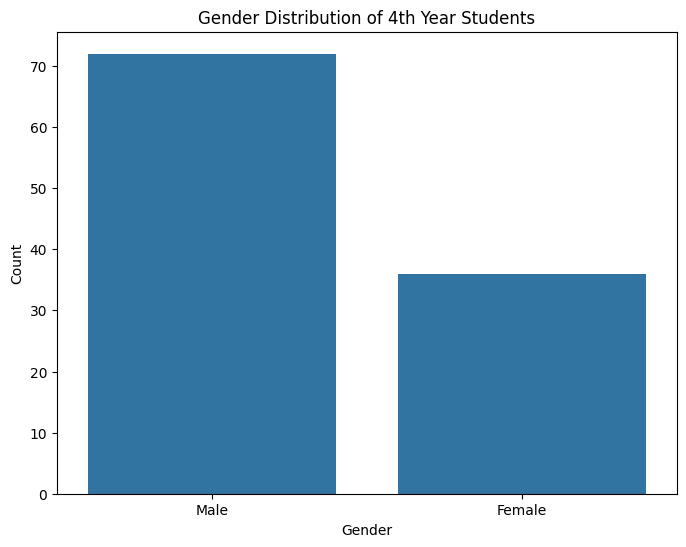

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for 4th-year students
fourth_year_students = df_cleaned[df_cleaned['Bachelor  Academic Year in EU'] == '4th Year']

# Count the occurrences of each gender in the filtered data
gender_counts = fourth_year_students['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution of 4th Year Students')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

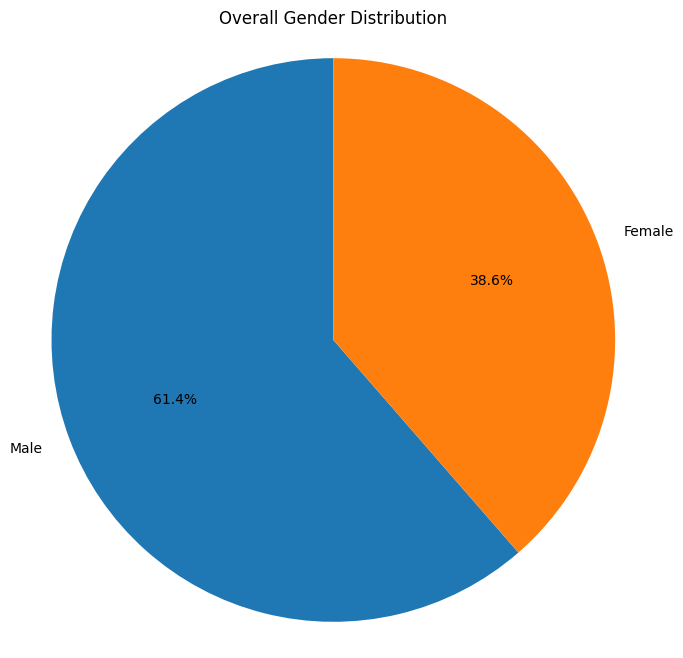

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = df_cleaned['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Gender Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()